## 2017년 대선: 여론조사 편향성 시비에 대한 짧은 분석

아침에 '김어준의 뉴스공장'을 들으며 출근을 하는데, 요새 공장장이 주로 불만을 터뜨리는 부분은 '여론조사'다. 몇달전만 하더라도 더민주의 문재인 후보가 대통령이 되는 것이 기정 사실이었는데, 어느새 국민의당 안철수 후보가 무섭게 치고 올라왔다. 그에 따른 여론조사 결과 역시 문후보와 안후보 사이의 박빙의 승부로 나타나고 있다.

공장장은 최근 여론조사가 보수 여론을 더 많이 반영하는 쪽으로 편향되어있다는 주장을 하고 있는데, 어제 방송에서는 아이오와대의 김재광 교수를 모셔서 특정 여론조사가 왜, 어떻게 편향되어있는지에 대해 설명했다. 여론조사나 통계를 전공하거나 깊이 공부해본 적은 없었지만, 그 짧은 인터뷰를 통해 교양적 지식과 좋은 아이디어를 몇개 얻었다. 

공장장과 김교수님의 주장처럼 정말 어떤 여론조사는 편향되어있을까? 특정 후보에의 유불리는 감안하지 않고 조사 기법과 그 히스토리만으로 정말 편향이 존재하는지에 대해서 데이터로 간단히 알아보자.

### 데이터 소스

본 분석에 사용한 데이터는 여론조사심의위원회 웹사이트(http://www.nesdc.go.kr/)에서 얻었다. python bs4로 간단히 웹크롤러를 만들어 최근 500개 정도 등록여론조사 결과를 조회한 후, 가설에 맞는 데이터를 가져왔다.

### 데이터 전처리

In [1]:
## 필요한 라이브버리를 임포트한다.
import pickle
import numpy as np
import pandas as pd
import glob
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font',family='AppleGothic')
%matplotlib inline

In [2]:
files = glob.glob("data/step-*.pickle")
lists = [pickle.load(open(file, "rb")) for file in files]
flattened = [val for sublist in lists for val in sublist]

In [3]:
df = pd.DataFrame(flattened)

In [4]:
## 총 500개의 여론조사 결과를 크롤링했다.
len(df)

500

## 대통령(대선) 주제 여론조사로 범위 한정 & 파싱 오류 제거

In [5]:
## 대통령, 대선 관련 여론조사만 확보한다.
def isPresidential(title):
    if ("대통령" in title) | ("대선" in title):
        return True
    else:
        return False

In [6]:
df['isPresidential'] = df.vote_title.map(isPresidential)
df = df[df.isPresidential == True]

In [7]:
## 여론조사 방법에 따른 비율의 총합이 95% 이상인 '완전한 데이터'만 한번 더 거른다. (만에 하나 파싱이 잘 안된 경우 방지)
df = df[df.method_ratio_sum > 95]

In [8]:
## 2016년 12월 1일 이후의 데이터만 보기로 한다.
df.regDate = df.regDate.map(lambda x: pd.to_datetime(x))
df = df[df.regDate >= '2016-12-01']

In [9]:
## 총 대선 여론조사 자료 수
len(df)

183

## 여론조사 개요: 주요 이벤트와 시간 흐름에 따른 여론조사 수

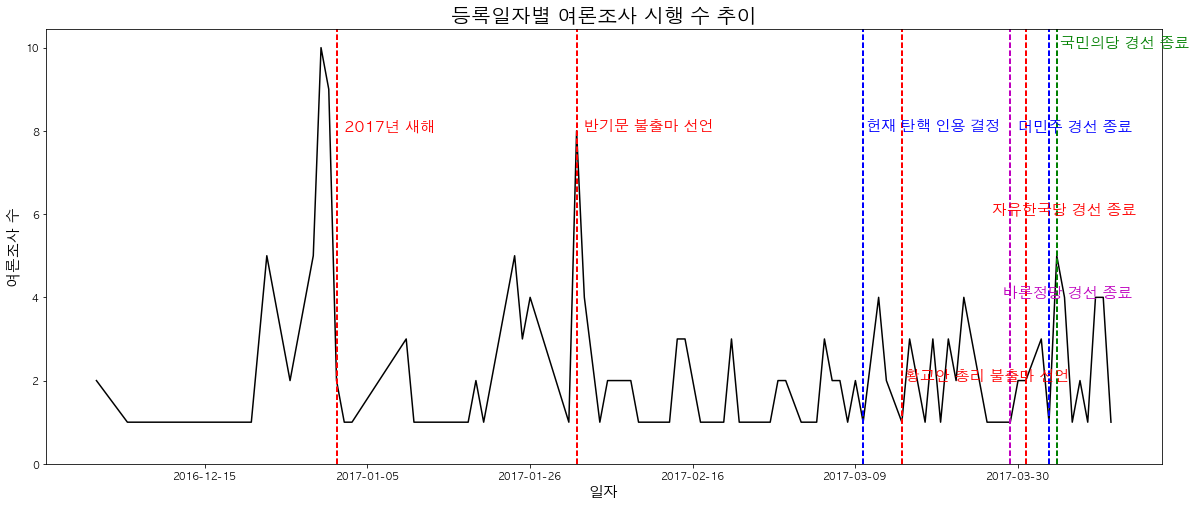

In [10]:
plt.figure(figsize=(20, 8))
plt.plot(df.groupby("regDate")['inst'].count(), color='k')
plt.ylim(ymin=0)

## 국민의당 경선종료
plt.axvline(x=datetime.strptime("2017-04-04", "%Y-%m-%d"), ymin=0, ymax = 100, linewidth=2, color='g', linestyle='--')
plt.annotate('국민의당 경선 종료', xy=(datetime.strptime("2017-04-04 09:00:00", "%Y-%m-%d %H:%M:%S"), 10), fontsize=15, color='g')

## 더민주 경선종료
plt.axvline(x=datetime.strptime("2017-04-03", "%Y-%m-%d"), ymin=0, ymax = 100, linewidth=2, color='b', linestyle='--')
plt.annotate('더민주 경선 종료', xy=(datetime.strptime("2017-03-30 00:00:00", "%Y-%m-%d %H:%M:%S"), 8), fontsize=15, color='b')

## 자유한국당 경선종료
plt.axvline(x=datetime.strptime("2017-03-31", "%Y-%m-%d"), ymin=0, ymax = 100, linewidth=2, color='r', linestyle='--')
plt.annotate('자유한국당 경선 종료', xy=(datetime.strptime("2017-03-26 15:00:00", "%Y-%m-%d %H:%M:%S"), 6), fontsize=15, color='r')


## 바른정당 경선종료
plt.axvline(x=datetime.strptime("2017-03-29", "%Y-%m-%d"), ymin=0, ymax = 5, linewidth=2, color='m', linestyle='--')
plt.annotate('바른정당 경선 종료', xy=(datetime.strptime("2017-03-28 00:00:00", "%Y-%m-%d %H:%M:%S"), 4), fontsize=15, color='m')

## 황교안 총리 불출마 선언
plt.axvline(x=datetime.strptime("2017-03-15", "%Y-%m-%d"), ymin=0, ymax = 100, linewidth=2, color='r', linestyle='--')
plt.annotate('황교안 총리 불출마 선언', xy=(datetime.strptime("2017-03-15 09:00:00", "%Y-%m-%d %H:%M:%S"), 2), fontsize=15, color='r')

## 탄핵 인용
plt.axvline(x=datetime.strptime("2017-03-10", "%Y-%m-%d"), ymin=0, ymax = 100, linewidth=2, color='b', linestyle='--')
plt.annotate('헌재 탄핵 인용 결정', xy=(datetime.strptime("2017-03-10 09:00:00", "%Y-%m-%d %H:%M:%S"), 8), fontsize=15, color='b')

## 반기문 불출마
plt.axvline(x=datetime.strptime("2017-02-01", "%Y-%m-%d"), ymin=0, ymax = 100, linewidth=2, color='r', linestyle='--')
plt.annotate('반기문 불출마 선언', xy=(datetime.strptime("2017-02-02 00:00:00", "%Y-%m-%d %H:%M:%S"), 8), fontsize=15, color='r')

## 새해
plt.axvline(x=datetime.strptime("2017-01-01", "%Y-%m-%d"), ymin=0, ymax = 100, linewidth=2, color='r', linestyle='--')
plt.annotate('2017년 새해', xy=(datetime.strptime("2017-01-02 00:00:00", "%Y-%m-%d %H:%M:%S"), 8), fontsize=15, color='r')




plt.title("등록일자별 여론조사 시행 수 추이", fontsize=20)
plt.xlabel("일자", fontsize=15)
plt.ylabel("여론조사 수", fontsize=15)

plt.show()

## 여론조사 기관 및 의뢰자 추이

여론조사 최다 의뢰기관은 리서치뷰, the leader, 쿠키뉴스, 한국지방신문협회 등이었다. 우리가 흔히 알고 있는 지상파 TV나 신문사가 최다 의뢰기관이 아닌 점이 흥미롭다.

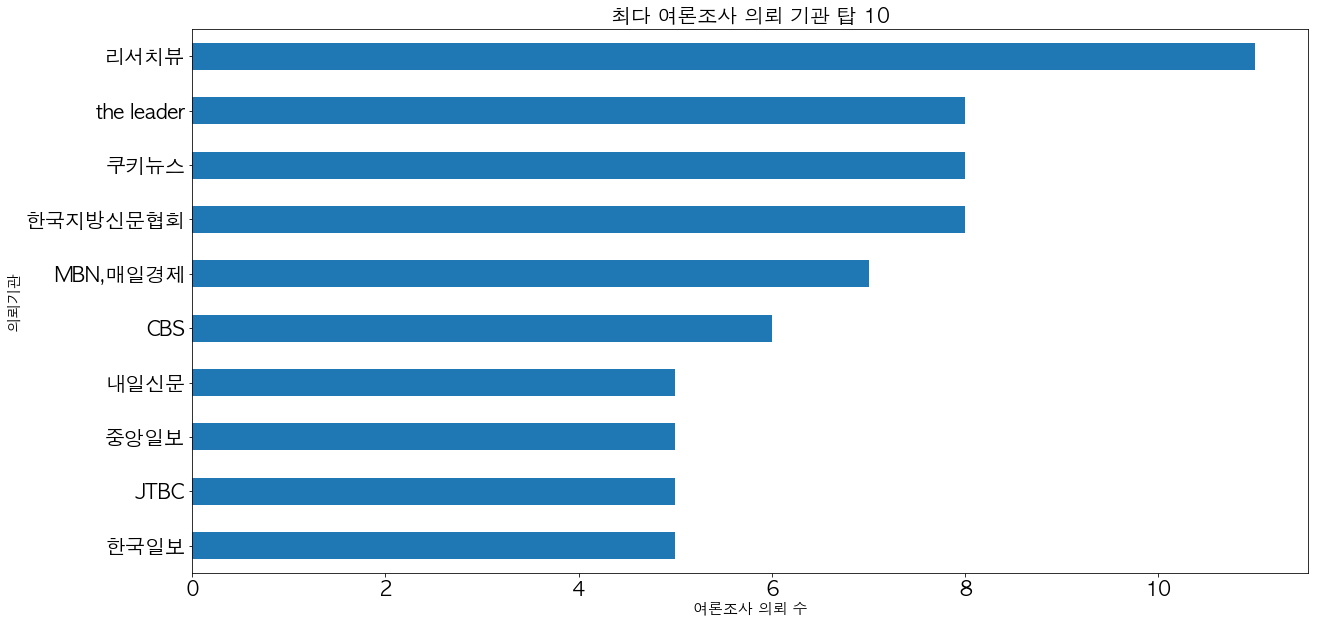

In [11]:
plt.figure(figsize=(20, 10))
df.groupby('client')['inst'].count().sort_values(ascending=False)[:10].sort_values().plot(kind='barh', sort_columns=False)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title("최다 여론조사 의뢰 기관 탑 10", fontsize=20)
plt.xlabel("여론조사 의뢰 수", fontsize=15)
plt.ylabel("의뢰기관", fontsize=15)

plt.show()

가장 많은 여론조사를 수행한 조사기관은, 뉴스에서 한번쯤 들어본 리얼미터였다. 유명한 기업 중 하나로 한국리서치, 리서치앤리서치 등이 보인다.

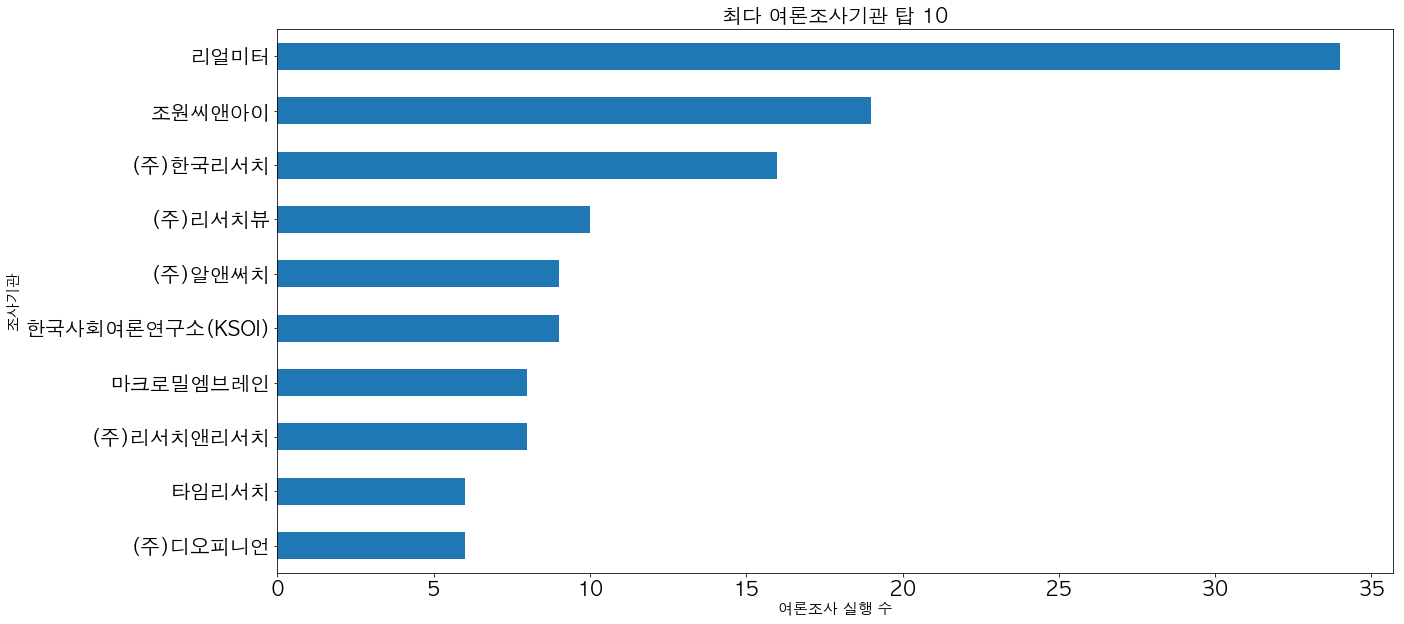

In [12]:
plt.figure(figsize=(20, 10))
df.groupby('inst')['inst'].count().sort_values(ascending=False)[:10].sort_values().plot(kind='barh', sort_columns=False)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title("최다 여론조사기관 탑 10", fontsize=20)
plt.xlabel("여론조사 실행 수", fontsize=15)
plt.ylabel("조사기관", fontsize=15)

plt.show()

## 유선 비율 비교: 19개 조사기관이 40% 이상의 비율로 유선 여론조사 실행해-

데이터를 살펴보니 여론조사 방식은 방법에 따라 크게 4가지: 유선, 무선, 스마트폰, 인터넷으로 나뉘고, 대부분 유선/무선으로 분류된다. 요새는 집전화가 없는 세대가 많기 때문에 유선의 비율을 낮추는 것이 더 정확한 통계적 추정을 할 수 있다고 하는데, 정확한 수치는 잘 모르겠다. 보통 유선전화는 나이드신 세대에 더 많으므로, 해당 세대층의 보수성향을 감안할 때 유선 비율을 과도하게 높이면 보수 편향을 가속화할 가능성이 있다. 여론조사의 유선 비율을 살펴보자.

In [13]:
def wire_ratio(a_list):
    k = {m['method']: m['ratio'] for m in a_list}
    if '유선' in k.keys():
        res = float(k['유선'].replace("%", "")) / 100
    else:
        res = 0
    return res

In [14]:
df['wire_ratio'] = df.apply(lambda row: wire_ratio(row['methods']), axis=1)

순천투데이, 폴스미스, 비전코리아 순으로 조사기관의 여론조사 유선 비율이 높았다. 최근 공장장이 편향의심 사례로 언급했던 '(주)코리아리서치센터'도 5위에, '디오피니언'도 16위에 이름을 올렸다.

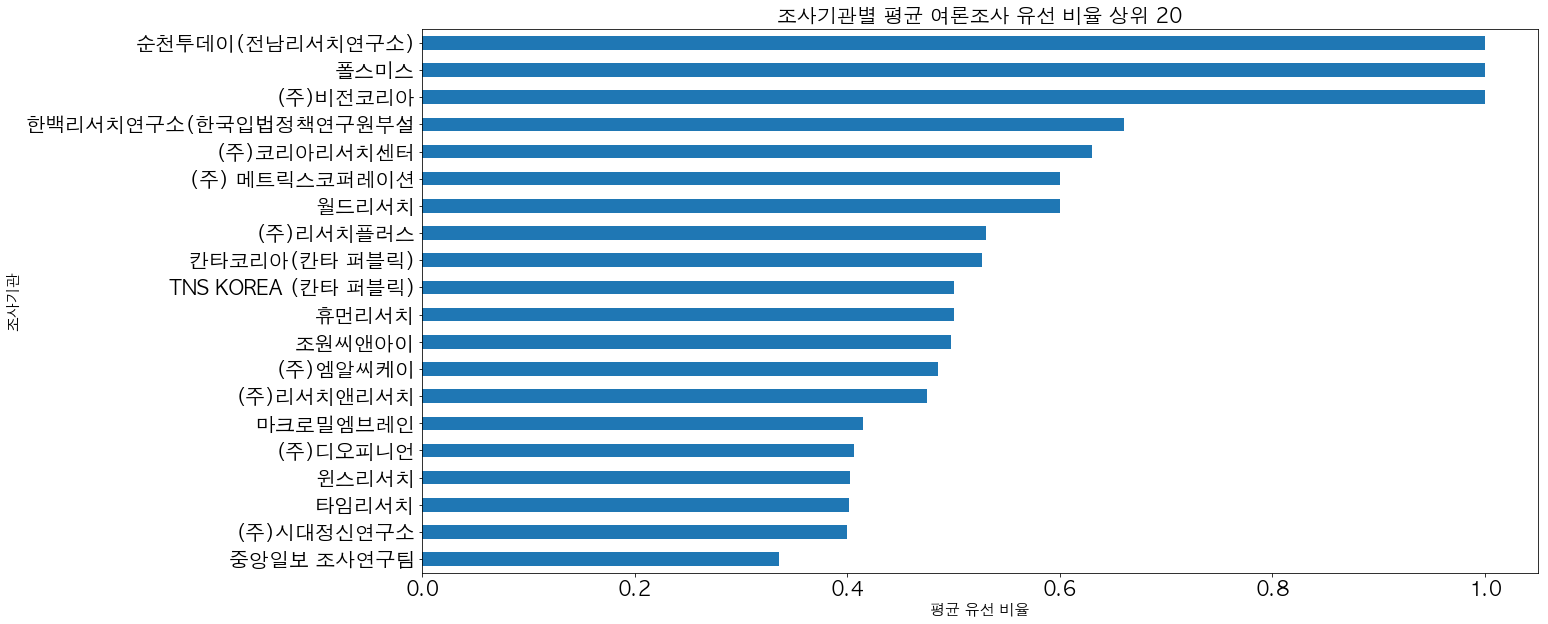

In [15]:
plt.figure(figsize=(20, 10))
df.groupby('inst')['wire_ratio'].mean().sort_values(ascending=False)[:20].sort_values().plot(kind='barh', sort_columns=False)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title("조사기관별 평균 여론조사 유선 비율 상위 20", fontsize=20)
plt.xlabel("평균 유선 비율", fontsize=15)
plt.ylabel("조사기관", fontsize=15)

plt.show()

의뢰기관도 특히 유선조사를 선호하는 곳이 있을까? 제주MBC, 전주KBS, 순천투데이 등 지방 신문사가 눈에 띈다. 아무래도 지방일수록 유선전화망이 건재하여 유선비율이 높은 것으로 추정된다. 가설과는 반대로 진보로 보통 분류되는 '오마이뉴스'나 '한겨레신문'이 눈에 띈다.

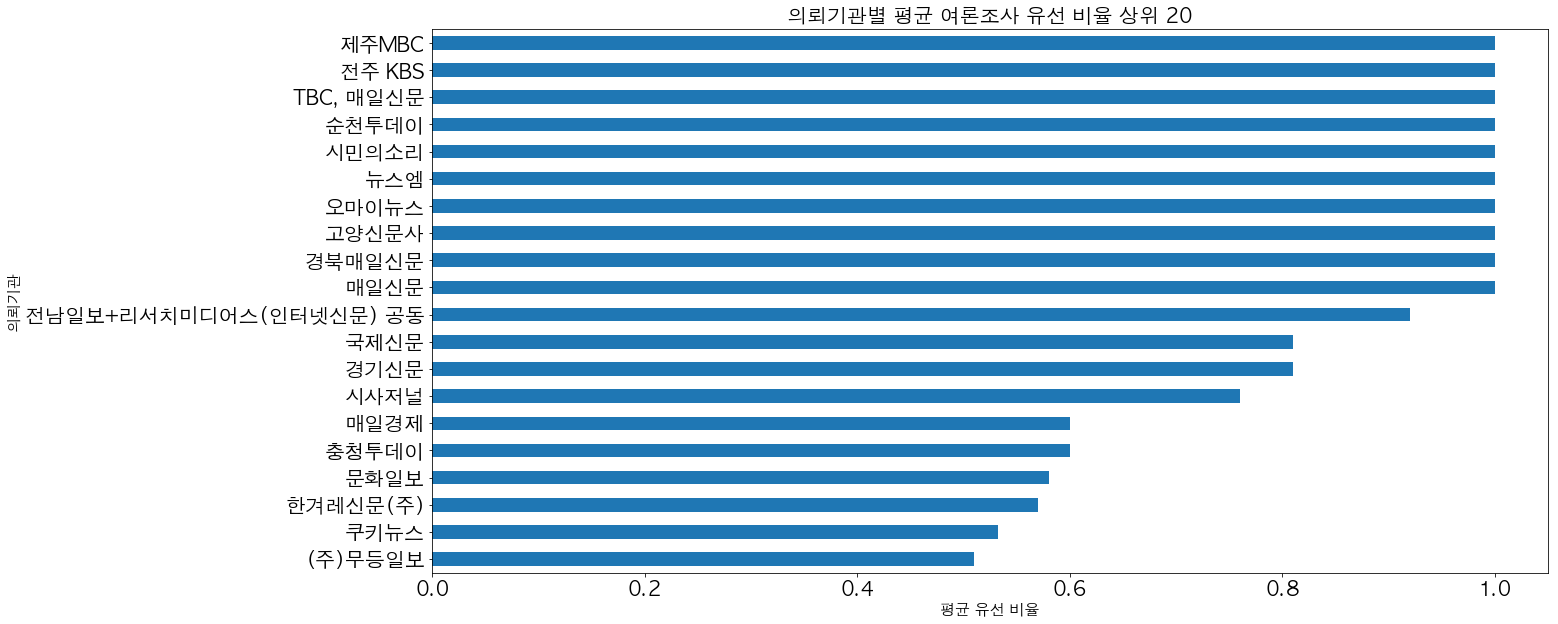

In [16]:
plt.figure(figsize=(20, 10))
df.groupby('client')['wire_ratio'].mean().sort_values(ascending=False)[:20].sort_values().plot(kind='barh', sort_columns=False)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title("의뢰기관별 평균 여론조사 유선 비율 상위 20", fontsize=20)
plt.xlabel("평균 유선 비율", fontsize=15)
plt.ylabel("의뢰기관", fontsize=15)

plt.show()

반대로 유선이 아닌 무선 조사를 선호하는 의뢰기관은 어딜까. 경향, 한겨레, 프레시안 등의 진보매체와 MBN, 매일경제, 이코노믹리뷰 등 경제신문사가 눈에 들어온다.

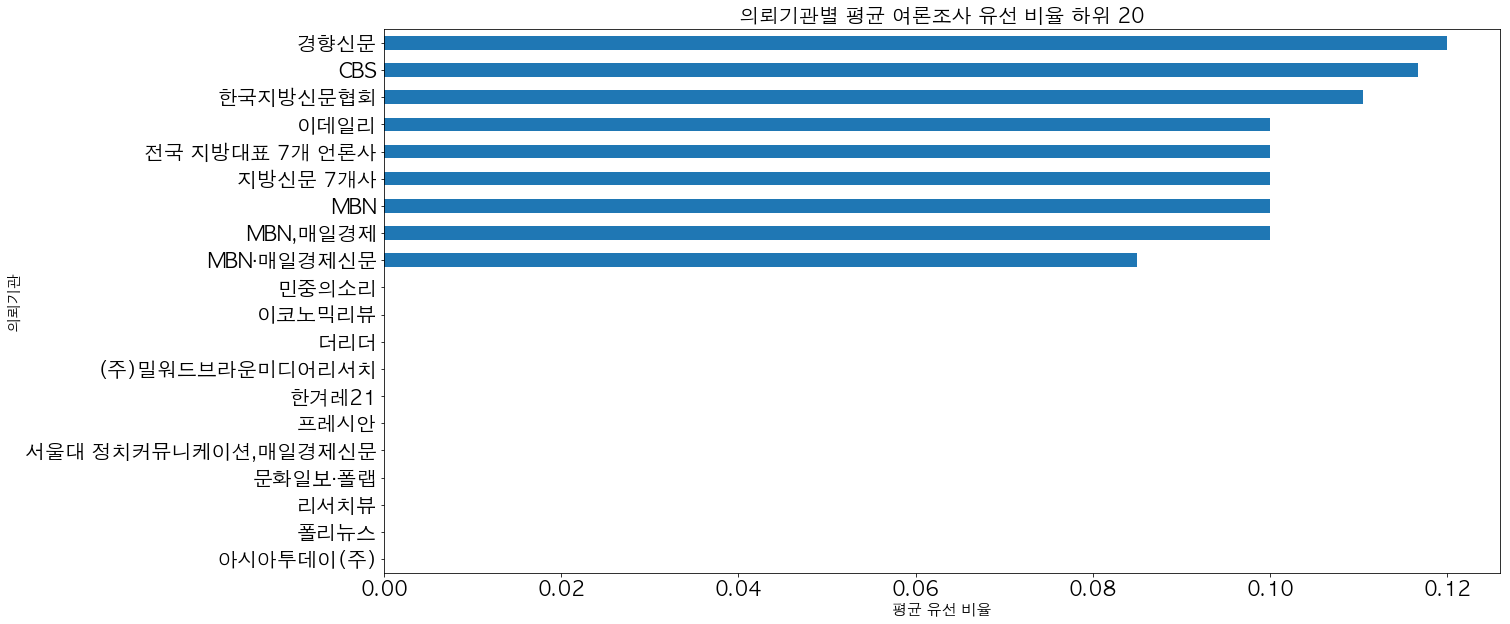

In [17]:
plt.figure(figsize=(20, 10))
res = df.groupby('client')['wire_ratio'].mean()

new_index = res.index.tolist()
new_index[1] = '전국 지방대표 7개 언론사'
res.index = new_index

res.sort_values(ascending=True)[:20].sort_values().plot(kind='barh', sort_columns=False)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title("의뢰기관별 평균 여론조사 유선 비율 하위 20", fontsize=20)
plt.xlabel("평균 유선 비율", fontsize=15)
plt.ylabel("의뢰기관", fontsize=15)

plt.show()

## 여론조사 신뢰도 측정

여론조사는 얼마나 공정하게 행해졌고, 얼마나 믿을 수 있을까? 김재광교수님의 코멘트에서 다음과 같은 아이디어를 추출했다. 이를 수치화해서 편향성을 분석해보기로 한다. 

* 여론조사가 하루만에 조사된 경우 보수적으로 편향될 수 있음
* 전체 샘플 규모 중 응답완료 사례 수가 지나치게 높은 경우 품질 의심
* 랜덤 전화번호 생성시 국번 다양성이 지나치게 작은 경우 품질 의심
* 전체 샘플 규모 대비 비적격 사례의 비율이 지나치게 작은 경우 품질 의심

## 여론조사 소요 시일

### 1-1) 여론조사의 절반(52%) 정도가 2일 소요됨. 1일이 소요된 여론조사 24% 정도 존재함

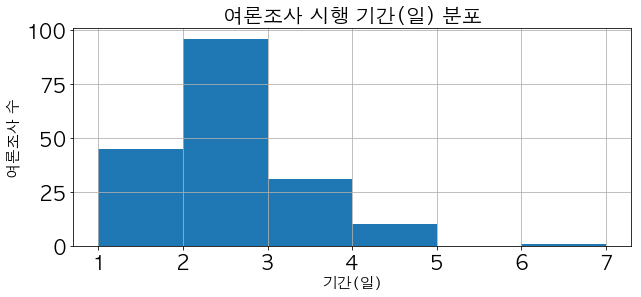

In [18]:
plt.figure(figsize=(10, 4))
df.period.hist(bins=6)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title("여론조사 시행 기간(일) 분포", fontsize=20)
plt.xlabel("기간(일)", fontsize=15)
plt.ylabel("여론조사 수", fontsize=15)

plt.show()

### 1-2) 주요 정치 이벤트에 의해 1일짜리 여론조사가 간혹 긴급 시행되는 것으로 일부 해석될 수 있음

각 당의 경선이 종료되면서 3월 후반부 평균 약 2일이 소요되던 여론조사 기간이, 경선 종료 시점과 맞물려 1일로 짧아지는 현상은 확인함. 시간의 흐름과 주요 이벤트에 비추어보아 경선 결과에 따른 급격한 여론 전환으로 인해 이를 빨리 캐치하고자 기간을 단축시킨 여론조사를 수행했을 가능성도 있음.

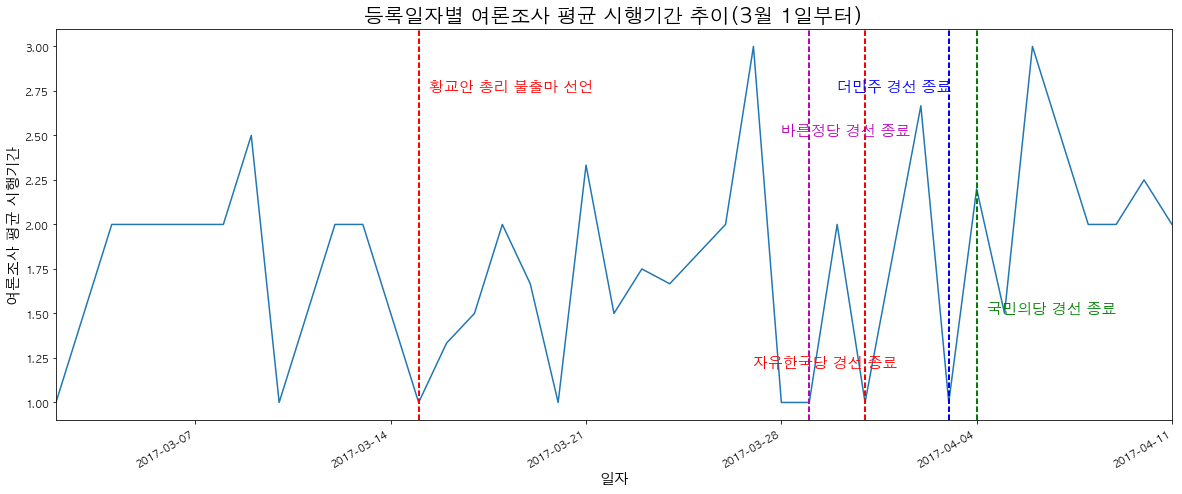

In [19]:
plt.figure(figsize=(20, 8))
df[df.regDate > '2017-03-01'].groupby('regDate').period.mean().plot()

## 국민의당 경선종료
plt.axvline(x=datetime.strptime("2017-04-04", "%Y-%m-%d"), ymin=0, ymax = 5, linewidth=2, color='g', linestyle='--')
plt.annotate('국민의당 경선 종료', xy=(datetime.strptime("2017-04-04 09:00:00", "%Y-%m-%d %H:%M:%S"), 1.5), fontsize=15, color='g')

## 더민주 경선종료
plt.axvline(x=datetime.strptime("2017-04-03", "%Y-%m-%d"), ymin=0, ymax = 5, linewidth=2, color='b', linestyle='--')
plt.annotate('더민주 경선 종료', xy=(datetime.strptime("2017-03-30 00:00:00", "%Y-%m-%d %H:%M:%S"), 2.75), fontsize=15, color='b')

## 자유한국당 경선종료
plt.axvline(x=datetime.strptime("2017-03-31", "%Y-%m-%d"), ymin=0, ymax = 5, linewidth=2, color='r', linestyle='--')
plt.annotate('자유한국당 경선 종료', xy=(datetime.strptime("2017-03-27 00:00:00", "%Y-%m-%d %H:%M:%S"), 1.2), fontsize=15, color='r')

## 바른정당 경선종료
plt.axvline(x=datetime.strptime("2017-03-29", "%Y-%m-%d"), ymin=0, ymax = 5, linewidth=2, color='m', linestyle='--')
plt.annotate('바른정당 경선 종료', xy=(datetime.strptime("2017-03-28 00:00:00", "%Y-%m-%d %H:%M:%S"), 2.5), fontsize=15, color='m')


## 황교안 총리 불출마 선언
plt.axvline(x=datetime.strptime("2017-03-15", "%Y-%m-%d"), ymin=0, ymax = 5, linewidth=2, color='r', linestyle='--')
plt.annotate('황교안 총리 불출마 선언', xy=(datetime.strptime("2017-03-15 09:00:00", "%Y-%m-%d %H:%M:%S"), 2.75), fontsize=15, color='r')



plt.title("등록일자별 여론조사 평균 시행기간 추이(3월 1일부터)", fontsize=20)
plt.xlabel("일자", fontsize=15)
plt.ylabel("여론조사 평균 시행기간", fontsize=15)

plt.show()

### 1-3) 조사기관이 조직적으로 조사기간을 단축했다고 보기는 어려워

경선이 종료되는 시점을 3월 28일로 잡고, 이전과 이후에 각 조사기관별로 여론조사에 소요된 시일을 계산했다. 이전 평균에서 이후 평균을 뺐을 때, 큰 양의 값이 나온다면, 해당 조사기관의 조사기간이 크게 줄어들었다고 볼 수 있다. 분석 결과 '마크로밀엠브레인은 3월 28일 이전 평균 2.14일을 소요했으나 이후에는 1일로, 가설에 부합하는 결과를 보였다. 그러나 이를 제외한 나머지 조사기관에서는 그와 유사한 큰 변화를 찾기는 어려웠다. 논란이 되었던 '디오피니언'은 계속 1일 단위 여론조사를 발표해왔고, '(주)코리아리서치센터'는 28일 이후 오히려 시일이 더 늘었다. 

In [20]:
c_df = df.copy()
def date_cls_func(date):
    if date <= datetime.strptime("2017-03-28", "%Y-%m-%d"):
        return "before"
    else:
        return "after"
c_df['date_cls'] = c_df['regDate'].map(date_cls_func)

c_df2 = c_df.groupby(['inst', 'date_cls']).period.mean().reset_index()
c_df3 = c_df2.pivot("inst", "date_cls")['period']
c_df3['diff'] = c_df3['before'] - c_df3['after']
c_df3 = c_df3[['before', 'after', 'diff']]

c_df3.dropna(inplace=True)

res_df = c_df3.sort_values(by="diff", ascending=False)
res_df

date_cls,before,after,diff
inst,,,
마크로밀엠브레인,2.142857,1.000000,1.142857
리얼미터,2.400000,2.000000,0.400000
(주)한국리서치,2.000000,1.666667,0.333333
폴스미스,1.250000,1.000000,0.250000
(주)리서치앤리서치,2.166667,2.000000,0.166667
한국사회여론연구소(KSOI),2.142857,2.000000,0.142857
(주)디오피니언,1.000000,1.000000,0.000000
(주)리서치플러스,2.000000,2.000000,0.000000
윈스리서치,1.000000,1.000000,0.000000


### 1-4) 유선/무선 기반 여론조사라고 해서 시행기간에 큰 차이는 없었음

유선 비율 40%를 기준으로, 유선 기반 / 무선 기반 여론조사를 나누고, 시간의 흐름에 따른 평균적인 기간(일) 소요와 전체 평균 소요일을 비교해보았다. 유선보다 편리한 무선의 특성상 더 시일이 단축될 것이라고 생각했었는데 별 차이 없었다.

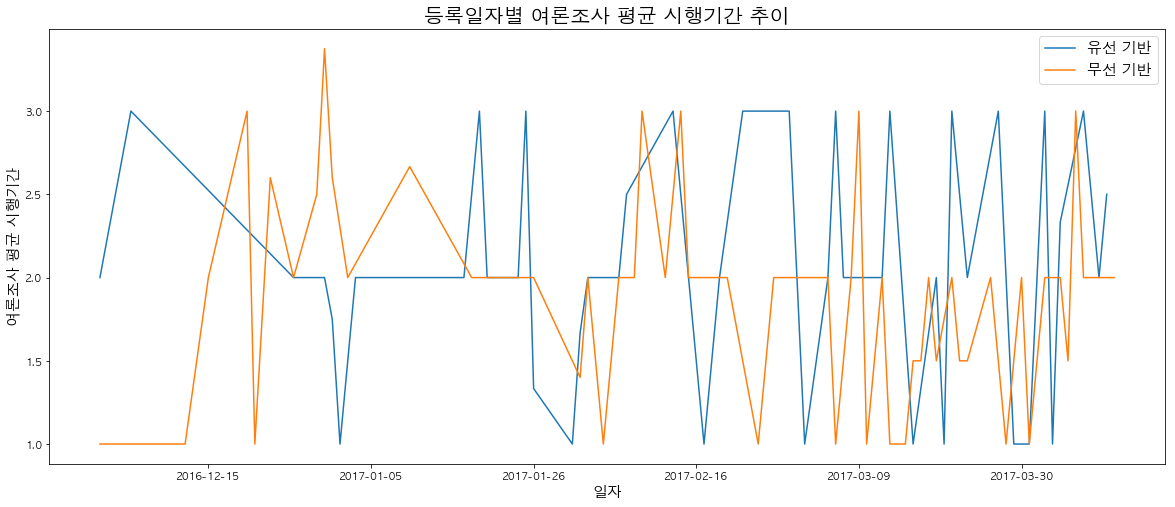

In [21]:
plt.figure(figsize=(20, 8))

wire_df = df.copy()

def wire_5p(wire_ratio):
    if wire_ratio >= 0.4:
        return("유선 기반")
    else:
        return("무선 기반")

wire_df['cls'] = wire_df['wire_ratio'].map(wire_5p)

# plt.plot(wire_df.groupby(['cls','regDate']).period.mean().reset_index().pivot("regDate", "cls"))

line1, = plt.plot(wire_df[wire_df['cls'] == "유선 기반"].groupby('regDate').period.mean(), label="유선 기반")
line2, = plt.plot(wire_df[wire_df['cls'] == "무선 기반"].groupby('regDate').period.mean(), label="무선 기반")


plt.title("등록일자별 여론조사 평균 시행기간 추이", fontsize=20)
plt.xlabel("일자", fontsize=15)
plt.ylabel("여론조사 평균 시행기간", fontsize=15)

plt.legend(handles=[line1, line2], fontsize=15)

plt.show()

In [22]:
wire_df.groupby('cls')['period'].mean()

cls
무선 기반    2.029412
유선 기반    2.098765
Name: period, dtype: float64

### 1-4) 평균 여론조사 시행기간 최소 3 조사기관: (주)디오피니언, 윈스리서치, 폴스미스

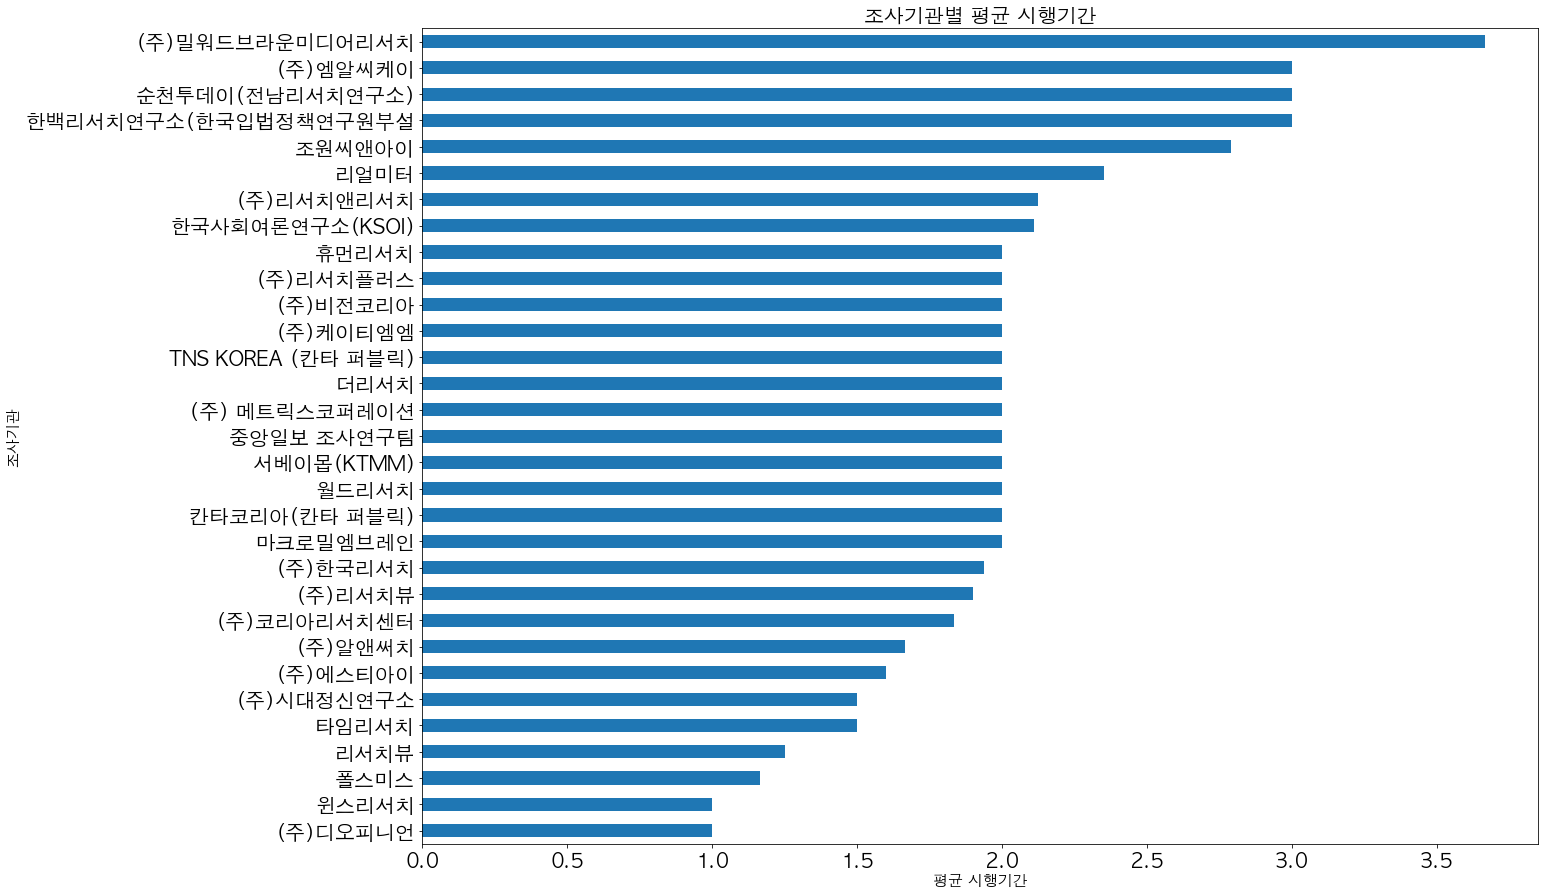

In [23]:
plt.figure(figsize=(20,15))
df.groupby('inst')['period'].mean().sort_values().plot(kind='barh')

plt.tick_params(axis='both', which='major', labelsize=20)

plt.title("조사기관별 평균 시행기간", fontsize=20)
plt.xlabel("평균 시행기간", fontsize=15)
plt.ylabel("조사기관", fontsize=15)

plt.show()

### 1-5) 평균 여론조사 시행기간 최소 의뢰기관: 매일신문, MBN, JTBC 등

JTBC와 MBN 등 메이저 미디어의 여론조사 시행시간이 평균 1일에 가깝다는 것이 기존 예상과 달랐다.

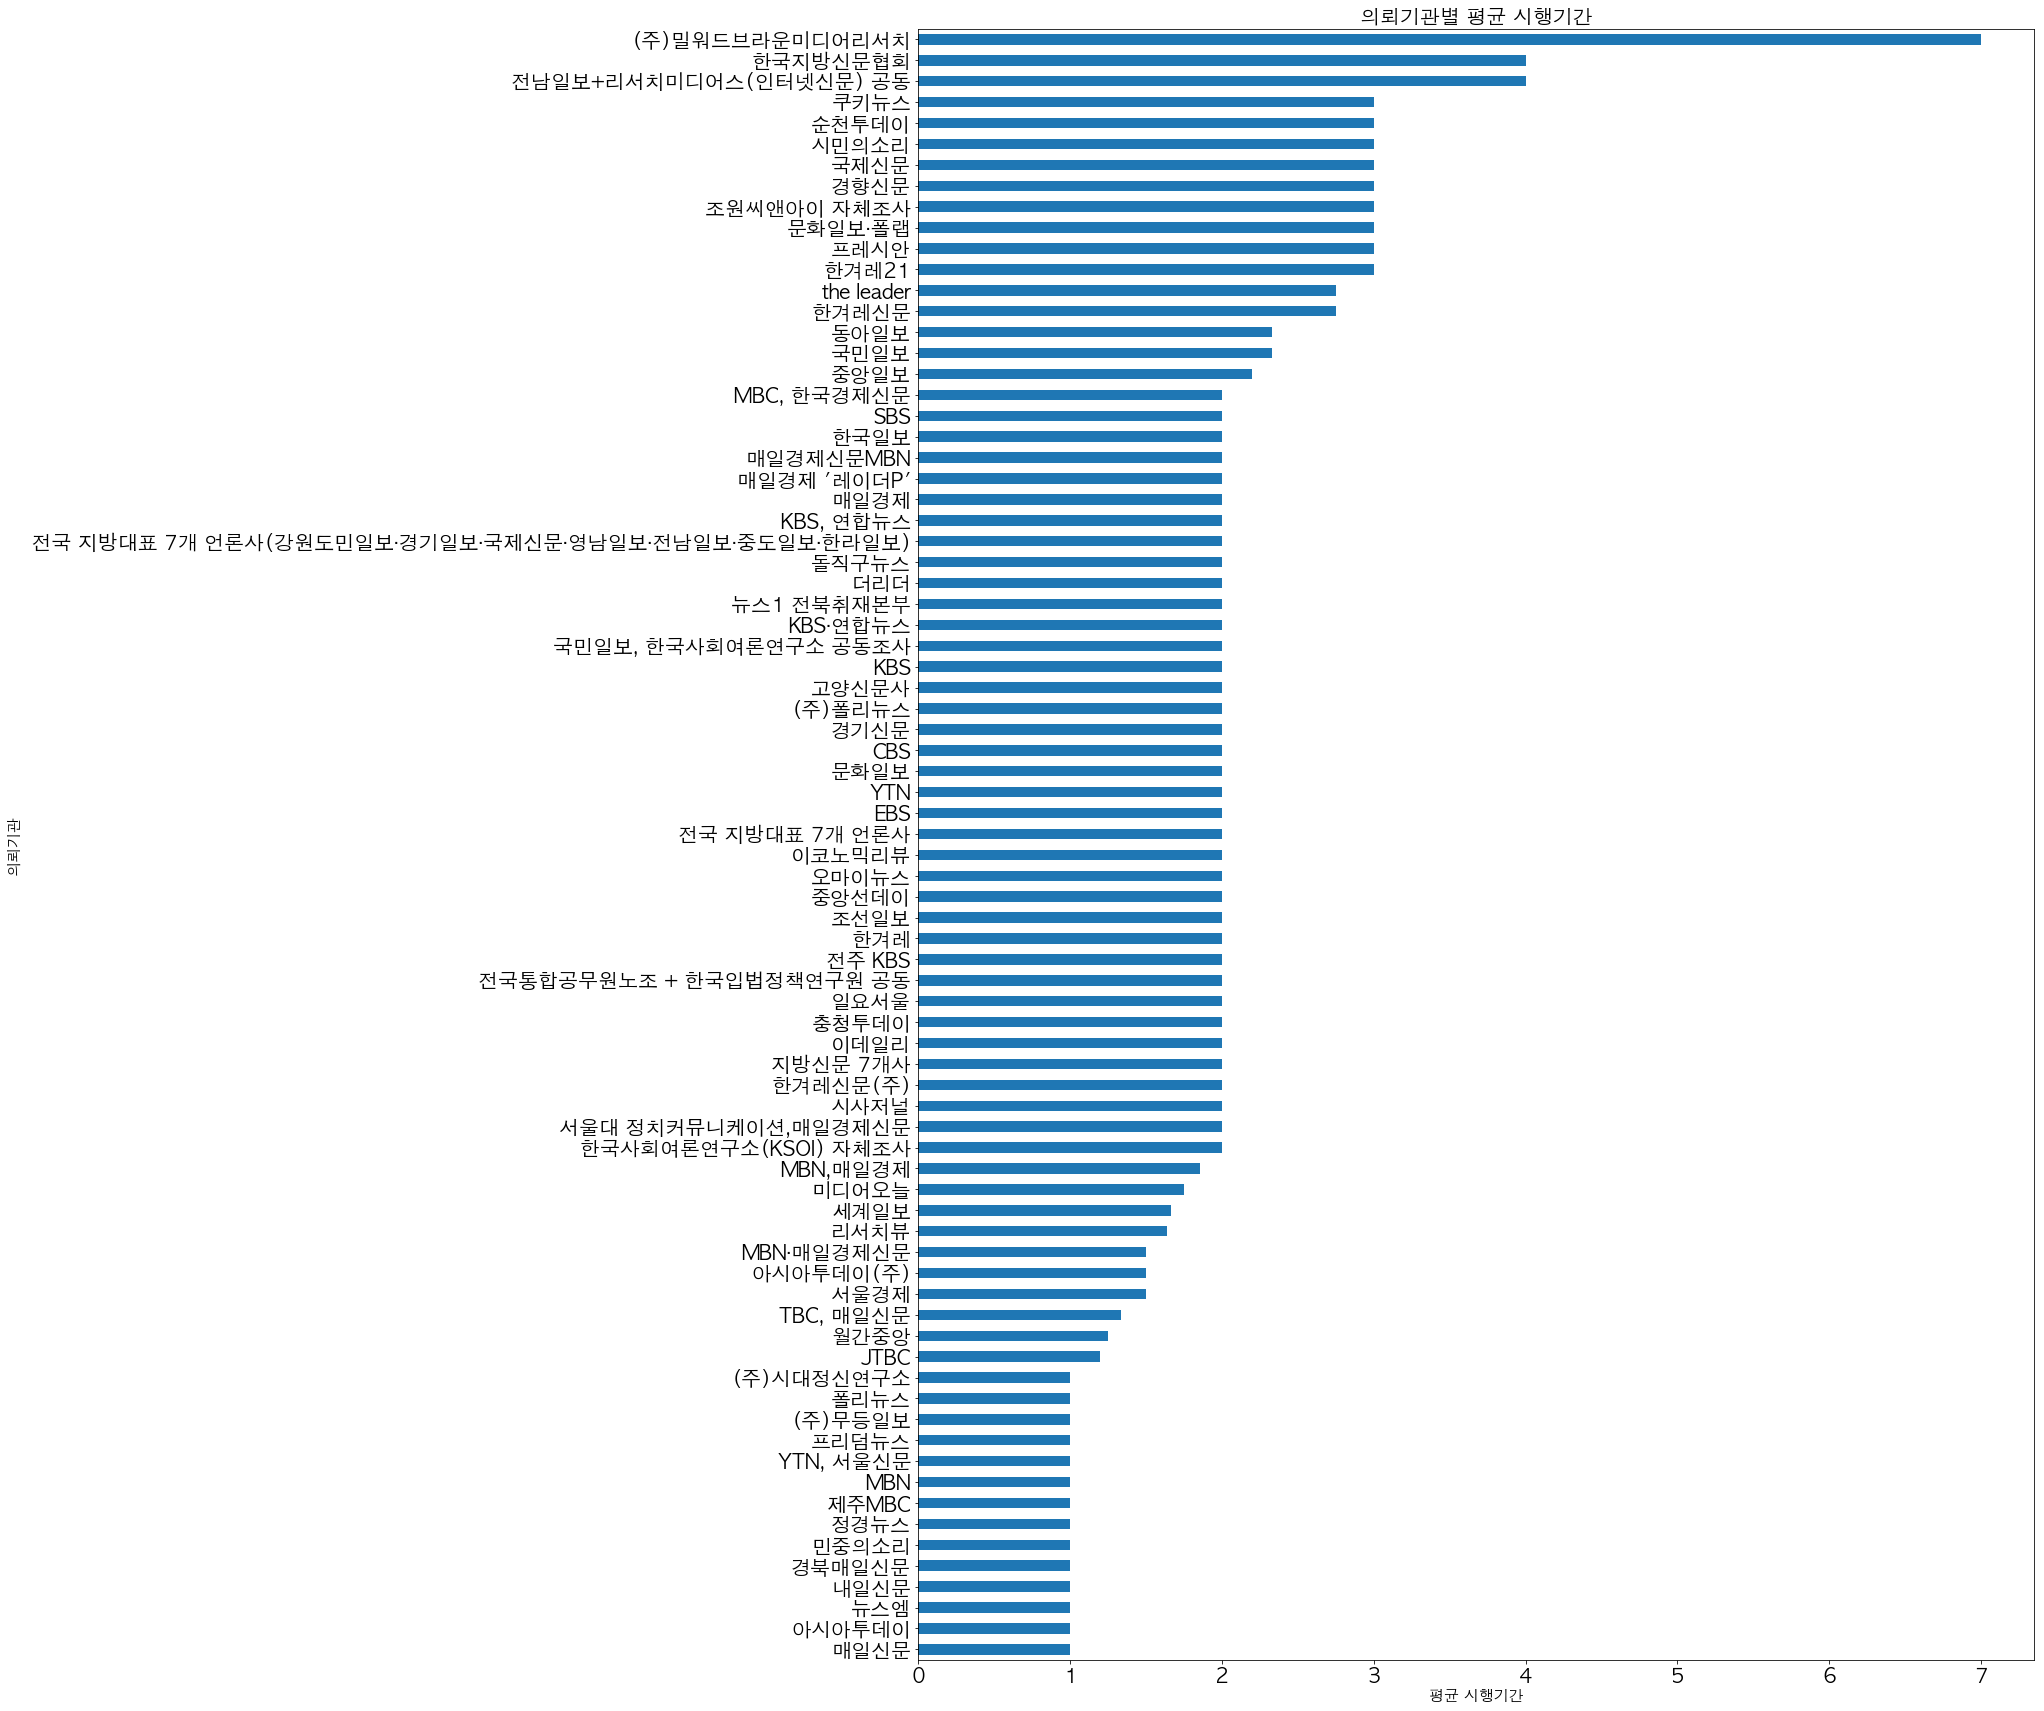

In [24]:
plt.figure(figsize=(20,30))
res = df.groupby('client')['period'].mean()

new_index = res.index.tolist()
new_index[0] = '전국 지방대표 7개 언론사'
res.index = new_index
res.sort_values().plot(kind='barh')


plt.tick_params(axis='both', which='major', labelsize=20)

plt.title("의뢰기관별 평균 시행기간", fontsize=20)
plt.xlabel("평균 시행기간", fontsize=15)
plt.ylabel("의뢰기관", fontsize=15)

plt.show()

## 2. 전체 샘플 대비 응답성공 비율

### 2-1) 여론조사별로 전체 샘플 대비 응답성공 비율은 4% 미만으로, 1% 미만이가장 많음

최대값은 4% 정도로, 예상을 뛰어넘는 높은 수치는 아니었음

In [25]:
def success_to_sample_r_calc(a_list):
    sample_size = np.sum([m['sample_size'] for m in a_list])
    success_size = np.sum([m['success_size'] for m in a_list])
    return round(success_size / sample_size, 4)

In [26]:
df['ssr'] = df.apply(lambda row: success_to_sample_r_calc(row['methods']), axis=1)

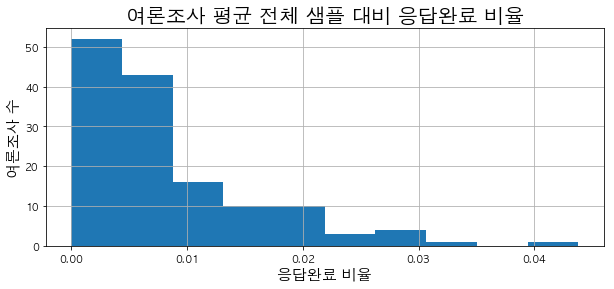

In [27]:
plt.figure(figsize=(10,4))
df.ssr.hist()

plt.title("여론조사 평균 전체 샘플 대비 응답완료 비율", fontsize=20)
plt.xlabel("응답완료 비율", fontsize=15)
plt.ylabel("여론조사 수", fontsize=15)

plt.show()

### 2-2) 샘플대비 응답비율 탑: (주)리서치앤리서치, (주)리서치뷰, (주)한국리서치, (주)엠알씨케이, (주)코리아리서치센터

전체 샘플 대비 응답성공 비율이 높다는 것은, 전화 번호를 뽑고 전화를 해서 필요한 양의 샘플을 빠르고 효율적으로 뽑았다는 것을 의미한다. 효율적이면 좋겠지만, 이 수치가 지나치게 높을 경우, 랜덤으로 번호를 뽑은 것이 아닌, 내부 DB를 활용한다던가, 데이터를 조작한다던가하는 부정의 소지가 있을 수도 있겠다. 

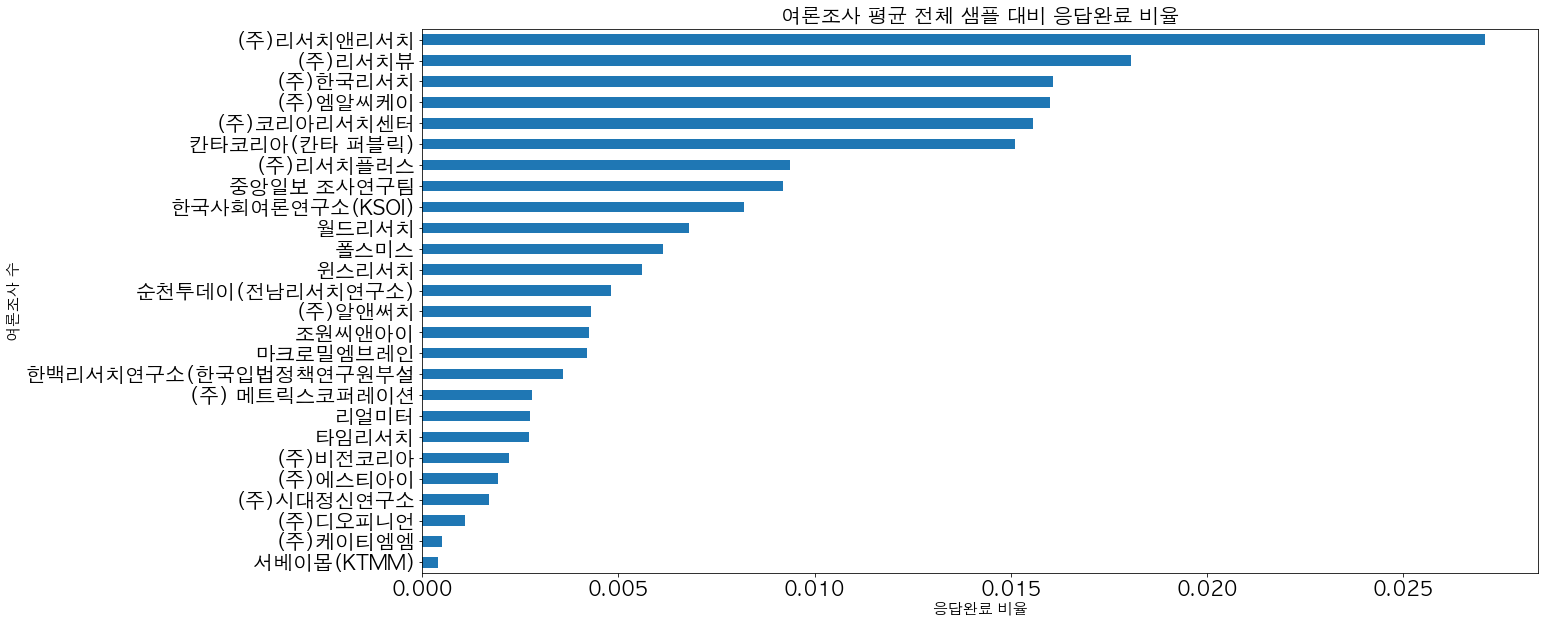

In [28]:
plt.figure(figsize=(20,10))
res = df.groupby('inst')['ssr'].mean()

res = res[pd.notnull(res)]

res.sort_values().plot(kind='barh')

plt.tick_params(axis='both', which='major', labelsize=20)

plt.title("여론조사 평균 전체 샘플 대비 응답완료 비율", fontsize=20)
plt.xlabel("응답완료 비율", fontsize=15)
plt.ylabel("여론조사 수", fontsize=15)

plt.show()

### 2-4) 국번당 응답수 비율 탑: (주)에스티아이, (주)알앤써치, 타임리서치, 월드리서치, (주)코리아리서치센터

여론조사결과 항목 중 피조사자 선정방법 - 표본추출틀 - 구축방법 란에 보면, xxx개 국번별 0001-9999번까지 무작위 생성이라는 항목이 있다. 김교수님은 여기서 국번의 갯수를 주목하는데, 최근 문제가 된 여론조사는 이전과 달리 단 60개만의 국번을 사용해 번호를 추출했다고 한다. 국번의 범위가 좁아지면, 특정 지역이나 정치색채가 유사한 사람들이 응답군에 들어갈 확률이 높아지므로, 여론조사의 신뢰도를 떨어뜨릴 수 있다. 이를 수치화해보기 위해 여론조사의 응답 성공 수를 국번 수로 나눠 그 비율을 구한다. 국번 수가 작으면 비율이 높아지므로, 높은 비율을 기록한 여론조사 기관을 의심해볼 수 있다.

In [29]:
def success_to_gb_r_calc(a_list):
    gb_size = np.sum([m['gb_size'] for m in a_list])
    success_size = np.sum([m['success_size'] for m in a_list])
    return round(success_size / gb_size, 4)

In [30]:
df['gb_ratio'] = df.apply(lambda row: success_to_gb_r_calc(row['methods']), axis=1)

/Users/jun/anaconda/envs/ds/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide


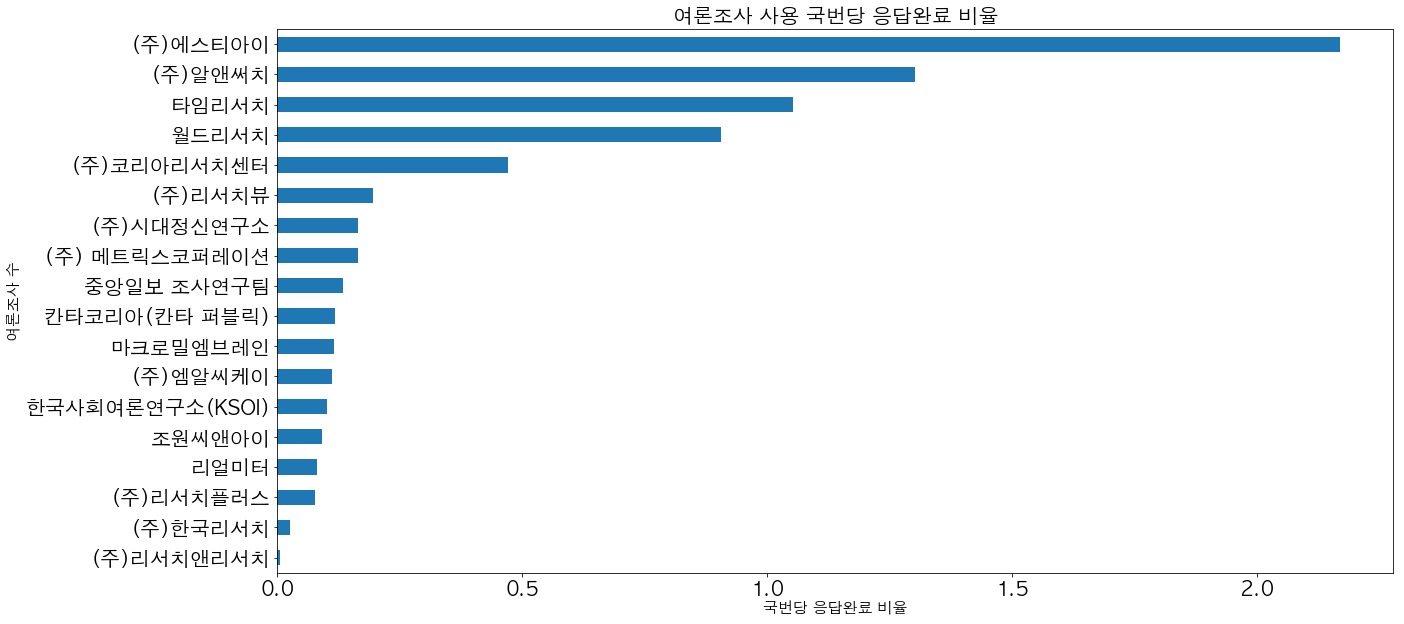

In [31]:
plt.figure(figsize=(20,10))
res = df.groupby('inst')['gb_ratio'].mean()
res.replace([np.inf, -np.inf], np.nan, inplace=True)
res = res[pd.notnull(res)]

res.sort_values().plot(kind='barh')


plt.tick_params(axis='both', which='major', labelsize=20)

plt.title("여론조사 사용 국번당 응답완료 비율", fontsize=20)
plt.xlabel("국번당 응답완료 비율", fontsize=15)
plt.ylabel("여론조사 수", fontsize=15)

plt.show()

### 2-5) 비적격 비율 바텀: (주)디오피니언, 한백리서치연구소, 서베이몹, (주)에스티아이, 마크로밀엠브레인

비적격 비율은 뽑은 무작위 번호로 전화를 걸었을 때, 결번, 팩스번호, 대상지역 아님, 할당초과 등으로 적격하지 않은 번호라 판정난 번호의 비율을 의미한다. 완전하게 랜덤으로 전화번호를 뽑았다면 이 비율은 높을 수 밖에 없고, 김재광교수님에 의하면 통상적으로 0.5 정도라고 한다. 매우 낮은 비적격 비율을 기록한 조사기관을 의심해볼 수 있다.

In [32]:
def inapp_to_sample_r_calc(a_list):
    inapp_size = np.sum([m['inapp_size'] for m in a_list])
    sample_size = np.sum([m['sample_size'] for m in a_list])
    return round(inapp_size / sample_size, 4)

In [33]:
df['inapp_ratio'] = df.apply(lambda row: inapp_to_sample_r_calc(row['methods']), axis=1)

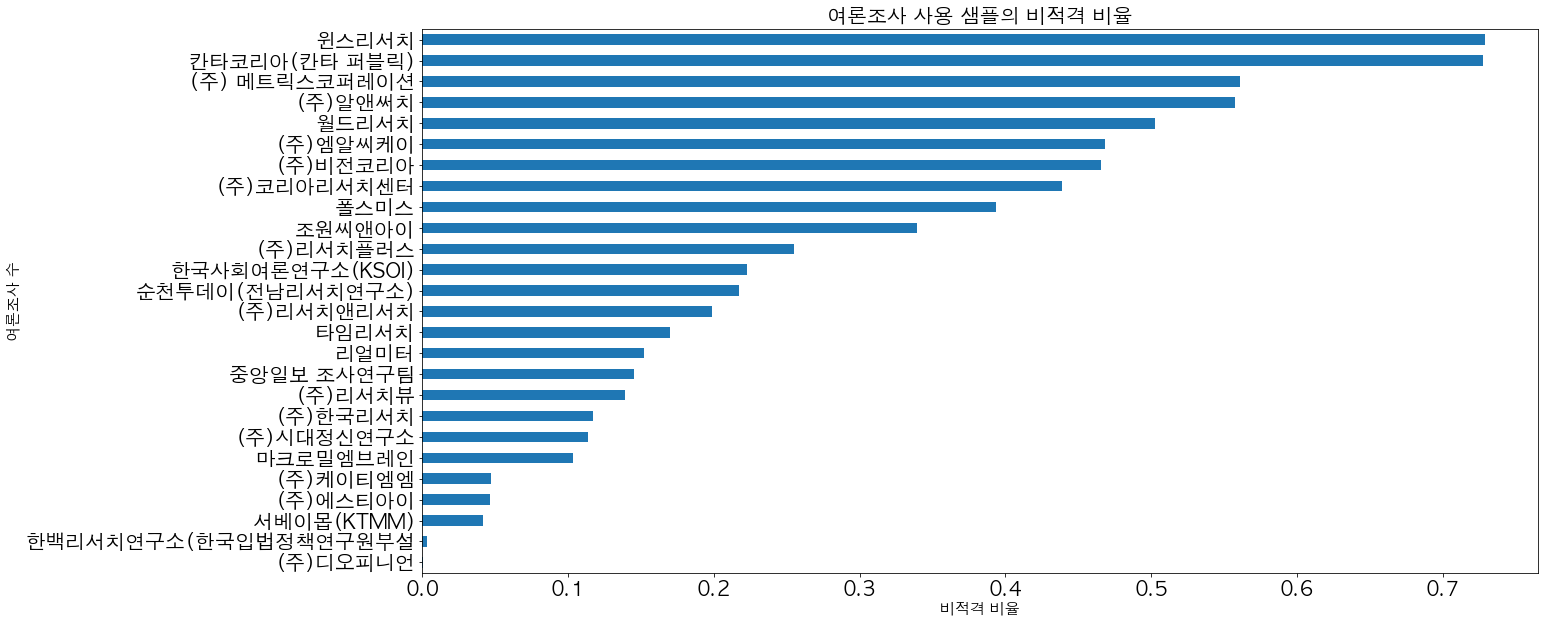

In [34]:
plt.figure(figsize=(20,10))
res = df.groupby('inst')['inapp_ratio'].mean()
res = res[pd.notnull(res)]
res.sort_values().plot(kind='barh')


plt.tick_params(axis='both', which='major', labelsize=20)

plt.title("여론조사 사용 샘플의 비적격 비율", fontsize=20)
plt.xlabel("비적격 비율", fontsize=15)
plt.ylabel("여론조사 수", fontsize=15)

plt.show()

## 자기유사도: 스탠스를 바꾼 기관은 어디냐?

지금까지 여러 기준으로 여론조사 기관을 살펴보았는데, 전체 기간을 두고 평균 비율을 살펴보았기 때문에, '시간'이라는 요소가 빠져, 궁극적으로 '어떤 인위적인 개입이 여론조사의 방법을 바꾸어놓았느냐?'라는 질문에 완전한 답은 하지 못했다. 그래서 앞에서 뽑은 수치 중 '유선 비율', '샘플대비 성공응답비율', '국번당 성공응답 수', '비적격 비율'로 특정 여론조사기관이 시간에 따라 어떻게 변화했는지를 감지해보자.

여기서 사용할 방식은 자기유사도(self similarity)로, 하나의 여론조사 기관이 여러번 조사를 했을 때 각 조사의 4가지 수치가 서로 얼마나 멀리 떨어져있는가를 계산해보기로 한다. 즉, A기관이 3번 여론조사(a, b, c)를 실시했다면, (a-b), (b-c), (c-a)의 유클리디언 디스턴스를 구한 후, 이를 평균내서 스탠스를 가장 많이 바꾼, 혹은 거의 변하지 않은 기관을 탐지해보자.  

In [35]:
def self_similarity(df, inst):
    t_df = df[df.inst == inst][['wire_ratio', 'ssr', 'gb_ratio', 'inapp_ratio']]
    t_df = t_df.dropna()
    
    recs = t_df.index
    
    dist_list = []
    for rec_i in recs:
        for rec_j in recs:
            if rec_i != rec_j:
                dist = np.linalg.norm(t_df.ix[rec_i]-t_df.ix[rec_j])
                dist_list.append(dist)
                
    return np.mean(dist_list)

In [36]:
similarity_dict = [{"inst": inst, "dist": self_similarity(df, inst)} for inst in df.inst.unique()]

/Users/jun/anaconda/envs/ds/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jun/anaconda/envs/ds/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### 변한 기관 탑 3: (주)알앤써치, 타임리서치, (주)코리아리서치센터 
### 안변한 기관 탑 3: (주)엠알씨케이, (주)한국리서치, 중앙일보 조사연구팀

유클리디언 디스턴스를 사용하기 전에, 사실 사용한 모든 4개 변수를 0과 1사이로 스케일링해줘야 모두 동일한 가중치로 거리에 영향을 주겠지만, 약간의 귀차니즘과 어차피 변할 놈은 변할 것이다라는 안일함 + 그래도 대충 비율로 구한 값이 있으니 괜찮다라는 생각으로 그냥 진행해보았다. 그 결과 변한 기관 중에 최초 가설에 의해 의심했던 (주)코리아리서치센터가 나왔다. 

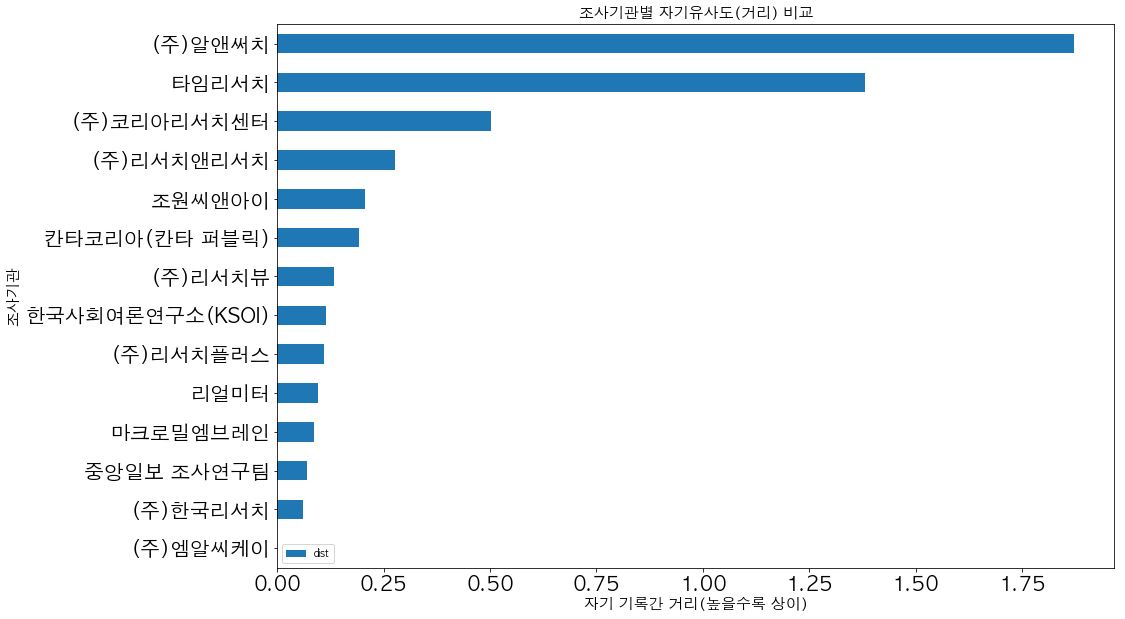

In [37]:
dist_df = pd.DataFrame(similarity_dict)
dist_df.dropna(inplace=True)
dist_df.set_index("inst", inplace=True)

plt.figure(figsize=(15,10))

ax = plt.subplot(111)

dist_df.sort_values(by="dist").plot(kind='barh', ax=ax)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.title("조사기관별 자기유사도(거리) 비교", fontsize=15)
plt.xlabel("자기 기록간 거리(높을수록 상이)", fontsize=15)
plt.ylabel("조사기관", fontsize=15)

plt.show()

실제로 얼마나 달라졌는지 육안으로 확인하기 위해서 다음과 같은 플롯 함수를 만든다.

In [38]:
def daily_plot(df, inst1, inst2):
    t_df = df[df.inst.isin([inst1, inst2])][['inst','regDate','wire_ratio', 'ssr', 'gb_ratio', 'inapp_ratio']]
    t_df.index = t_df.regDate
    
    plt.figure(figsize=(20, 8))

    
    ax1 = plt.subplot(221)
    line1_inst1 = t_df[t_df.inst == inst1]['wire_ratio'].plot(ax=ax1, label=inst1)
    line1_inst2 = t_df[t_df.inst == inst2]['wire_ratio'].plot(ax=ax1, label=inst2)
    ax1.title.set_text("유선 비율")
    
    
    ax2 = plt.subplot(222)
    line2_inst1 = t_df[t_df.inst == inst1]['ssr'].plot(ax=ax2)
    line2_inst2 = t_df[t_df.inst == inst2]['ssr'].plot(ax=ax2)
    ax2.title.set_text("샘플 대비 응답비율")
    
    
    ax3 = plt.subplot(223)
    line3_inst1 = t_df[t_df.inst == inst1]['gb_ratio'].plot(ax=ax3)
    line3_inst2 = t_df[t_df.inst == inst2]['gb_ratio'].plot(ax=ax3)
    ax3.title.set_text("국번당 응답비율")
    
    ax4 = plt.subplot(224)
    line4_inst1 = t_df[t_df.inst == inst1]['inapp_ratio'].plot(ax=ax4)
    line4_inst2 = t_df[t_df.inst == inst2]['inapp_ratio'].plot(ax=ax4)
    ax4.title.set_text("샘플 중 비적격 비율")
    
    ax1.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

알앤써치와 한국리서치를 비교해보자. 한국리서치는 유선 비율, 국번당 응답, 비적격 비율이 어느정도 일정하고, 응답 비율만 조금 떨어졌을 뿐이다. 반대로 알앤서치의 응답비율은 지속적으로 낮았으나, 유선 비율, 국번당 응답, 비적격 비율이 시간에 따라 춤을 춘다. 특히 비적격 비율은 급격하게 하락했다.

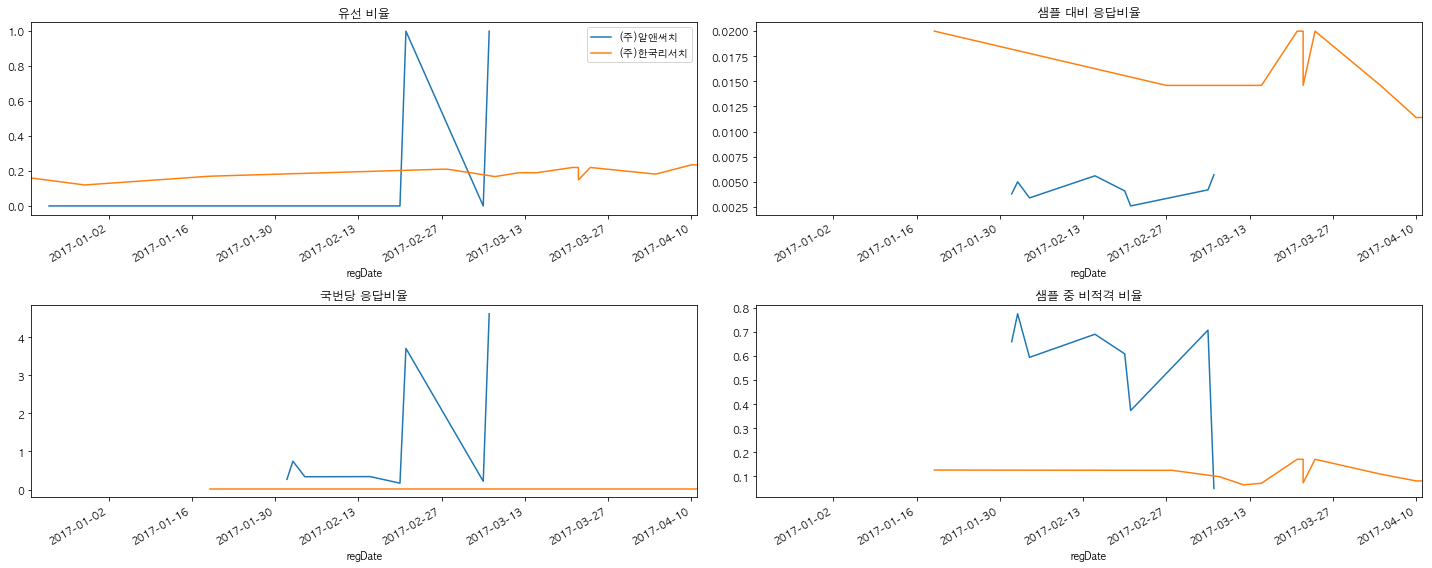

In [39]:
daily_plot(df, "(주)알앤써치", "(주)한국리서치")

대망의 (주)코리아리서치센터. 이 회사는 유선 비율은 어느정도 일정하게 유지하나, 3월 13일을 기점으로 샘플 대비 응답 비율이 크게 상승하고 (여론조사 중 최대값), 국번당 응답 수도 치솟았으며, 특히 비적격 비율이 0.5(정상범위)에서 갑자기 0.1 수준으로 급격하게 떨어졌다. 여론조사심의위원회에서는 신고가 접수된 여론조사에 대해서 면밀히 조사해본다고 하니, 그 결과를 몇주 내로 홈페이지에서 확인해볼 수 있을 듯 싶다. 

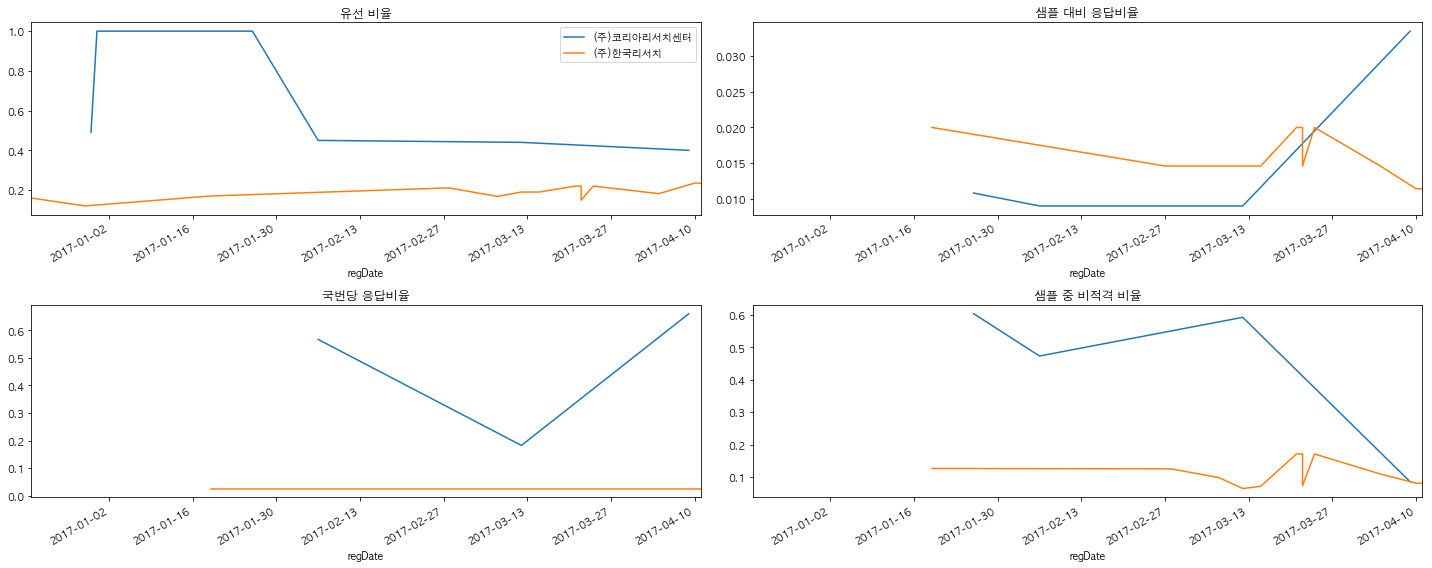

In [40]:
daily_plot(df, "(주)코리아리서치센터", "(주)한국리서치")

<끝!>